<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/Classification_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from sklearn.datasets import make_moons

features, labels = make_moons(5000)
len(features), len(labels)

(5000, 5000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [ ]:
X_train[:10], y_train[:10]

(array([[ 1.85611878, -0.0167791 ],
        [ 0.34064156,  0.94019324],
        [ 0.86571095,  0.50054426],
        [ 0.69146129, -0.45121179],
        [ 0.45807414,  0.88891399],
        [ 1.85546844, -0.01785495],
        [ 0.92777739, -0.49738854],
        [ 1.73305187, -0.18017274],
        [ 0.85806168,  0.51354665],
        [-0.96665405,  0.25608583]]),
 array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0]))

In [ ]:
X_train[0][1]

-0.016779096436281393

In [ ]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history = model.fit(X_train, y_train, epochs=30, callbacks=[lr_scheduler])

Epoch 1/30
125/125 [==============================] - 1s 2ms/step - loss: 2.4495 - accuracy: 0.5020 - lr: 1.0000e-04
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 2.0424 - accuracy: 0.5020 - lr: 1.1220e-04
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 1.8497 - accuracy: 0.5020 - lr: 1.2589e-04
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 1.6953 - accuracy: 0.5020 - lr: 1.4125e-04
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 1.5408 - accuracy: 0.5020 - lr: 1.5849e-04
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 1.3126 - accuracy: 0.5020 - lr: 1.7783e-04
Epoch 7/30
125/125 [==============================] - 0s 3ms/step - loss: 1.1407 - accuracy: 0.5020 - lr: 1.9953e-04
Epoch 8/30
125/125 [==============================] - 0s 2ms/step - loss: 1.0147 - accuracy: 0.5020 - lr: 2.2387e-04
Epoch 9/30
125/125 [==============================] - 0s 3ms/ste

<Axes: >

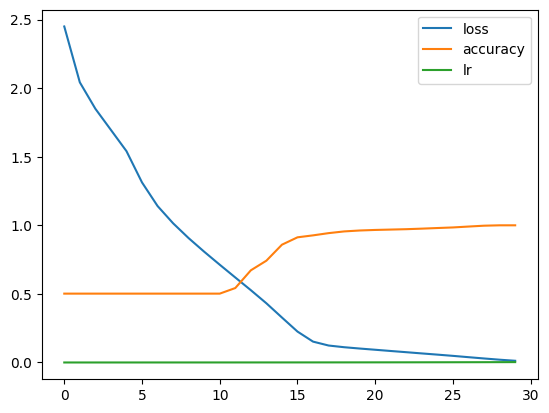

In [ ]:
pd.DataFrame(history.history).plot()

**Trying to get the optimal learning rate**

Text(0.5, 1.0, 'learning rate vs loss')

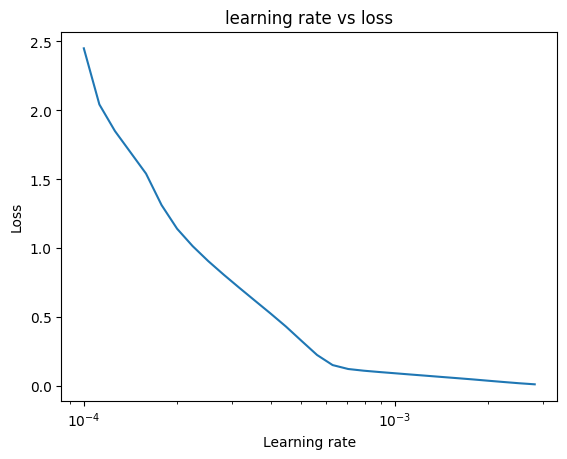

In [ ]:
lrs = 1e-4 * 10 ** (tf.range(30)/20) ## 100 is the no of epochs given
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('learning rate vs loss')

In [ ]:
10**-3

0.001

**We got the `ideal` learning rate i.e 0.001**

we could have choosen 10^-2.5 or some thing, but i choose 10^-3

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

model1_history = model_1.fit(X_train, y_train, epochs=30)

Epoch 1/30
125/125 [==============================] - 1s 2ms/step - loss: 2.2222 - accuracy: 0.5020
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 1.3774 - accuracy: 0.5020
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 0.8205 - accuracy: 0.5027
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7212
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8835
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.8967
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.8995
Epoch 8/30
125/125 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.8947
Epoch 9/30
125/125 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.8970
Epoch 10/30
125/125 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.8975

In [ ]:
model_1.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9580


[0.10574118793010712, 0.9580000042915344]

In [ ]:
pred = model_1.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [ ]:
y_test.shape, pred.shape

((1000,), (1000, 1))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, (tf.squeeze(pred)>0.5))

array([[461,  31],
       [ 11, 497]])

**Plotting the confusion matrix**

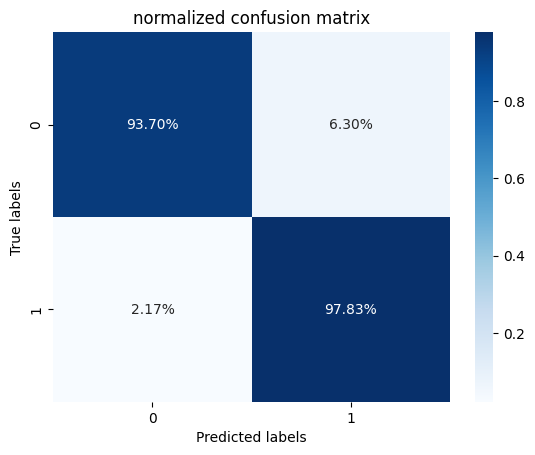

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, (tf.squeeze(pred)>0.5))

cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

classes = ['0', '1']

sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('normalized confusion matrix')
plt.show()